# **Bank Marketing**
Kita akan menggunakan dataset Bank Marketing dan lakukan visualisasi serta pra-proses dasar supaya bisa dilanjut ke klasifikasi. Berikut langkah & kodenya:

(mengacu ke dataset dari UCI “Bank Marketing” — fitur kategorikal + numerik, target binary “y” = apakah nasabah akan subscribe deposito)

## **Instalasi ucimlrepo package**
tersedia library resmi bernama ucimlrepo
 yang memungkinkan mengambil dataset dari UCI Machine Learning Repository langsung lewat kode Python, tanpa manual download.

In [2]:
pip install ucimlrepo

## **Import dataset**

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

Setelah berhasil import dataset lanjut gabungkan fetures dan targets

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Gabungkan jadi satu dataframe
df = pd.concat([X, y], axis=1)

# Lihat 5 baris pertama
print(df.head())

# Info & tipe data
print(df.info())

# Cek distribusi target
print(df['y'].value_counts())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to

## **Visualisasi**
Karena banyak fitur (numerik + kategorikal), beberapa visualisasi yang cocok:
###**Histogram / distribusi fitur numerik**

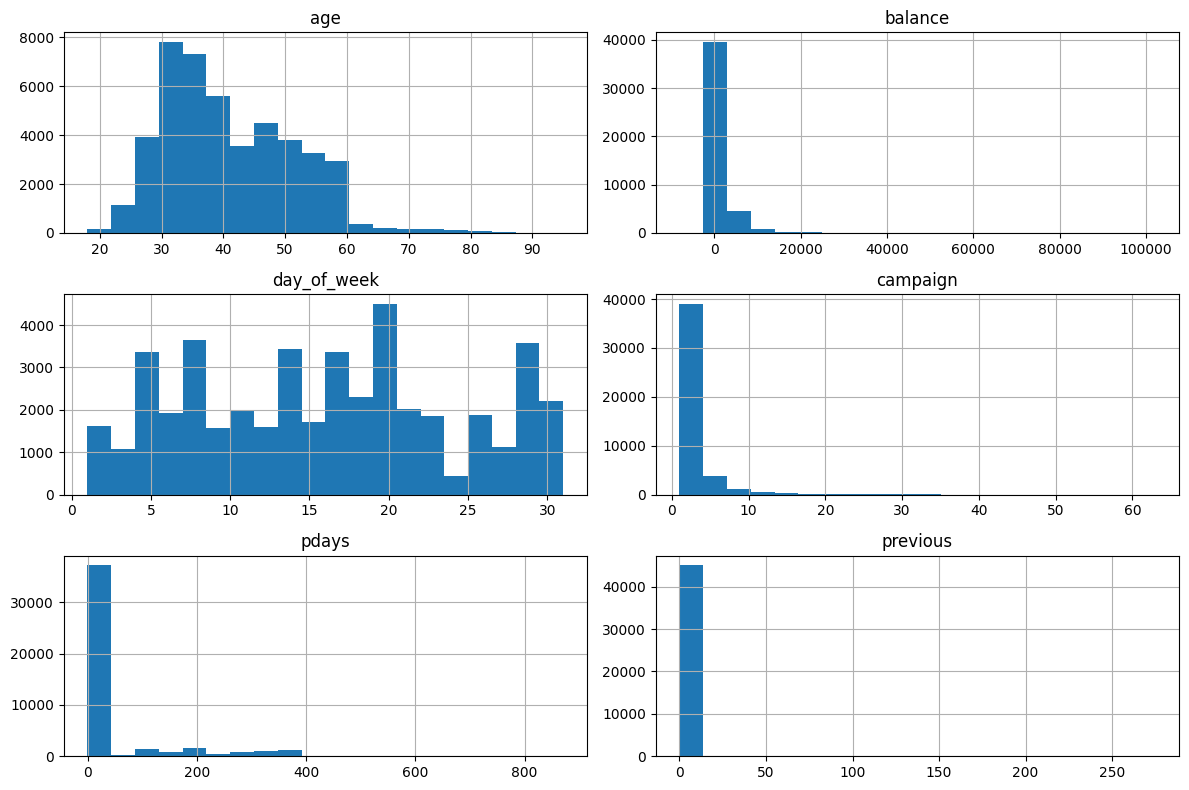

In [5]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols.remove('duration')  # optional kalau ingin mengecualikan fitur durasi jika terlalu memengaruhi

df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


### **Boxplot numerik vs target**

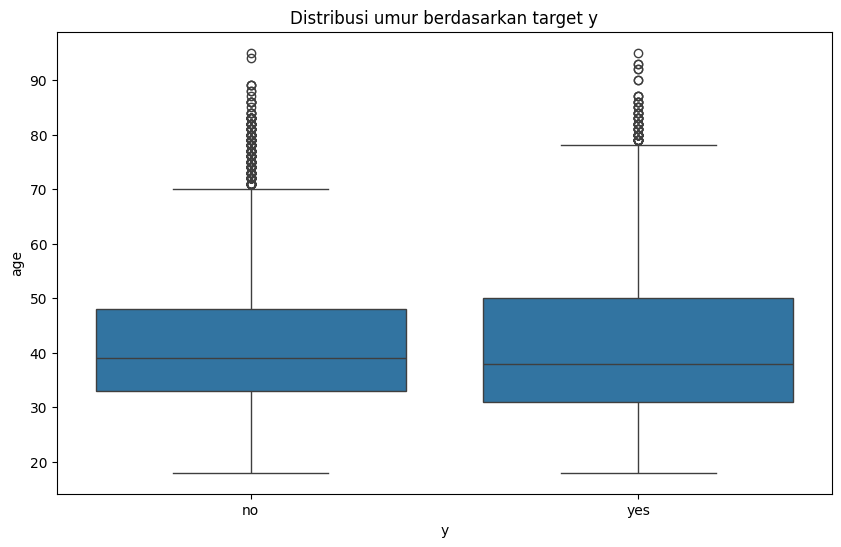

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='age')
plt.title("Distribusi umur berdasarkan target y")
plt.show()


Bisa juga lakukan boxplot serupa untuk fitur numerik lainnya vs y.

### **Countplot fitur kategorikal**

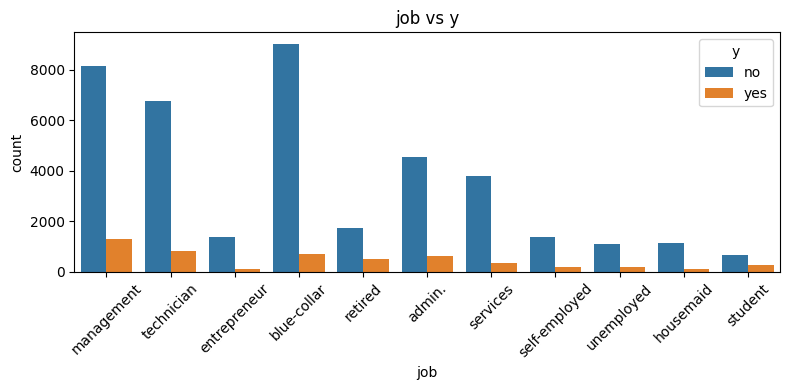

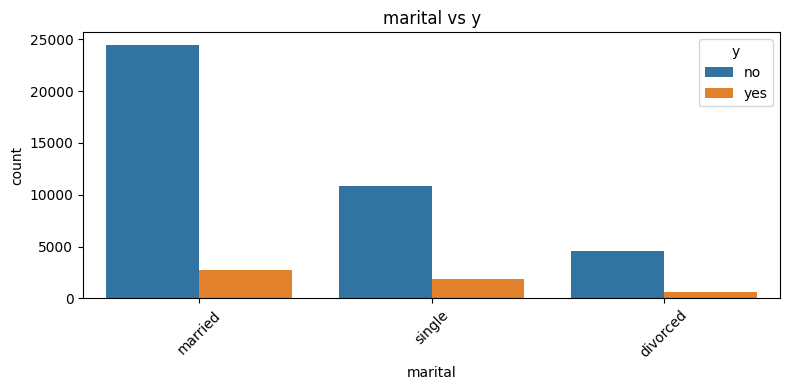

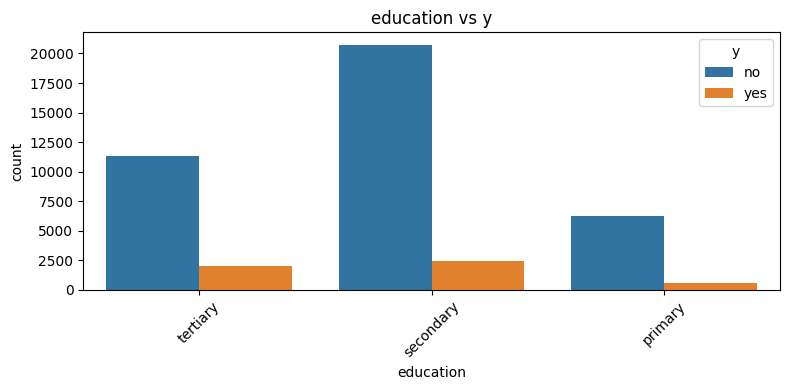

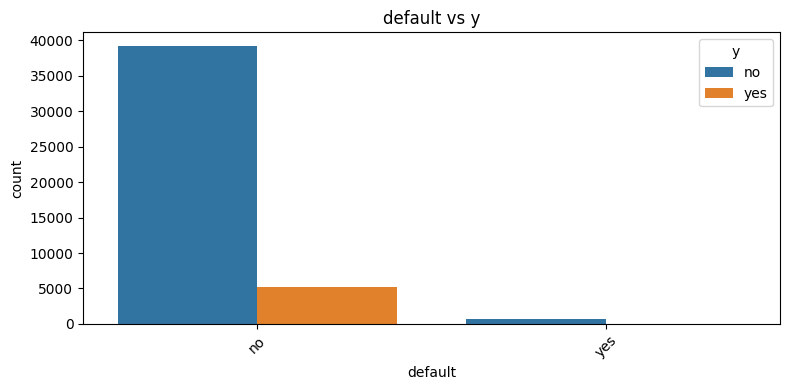

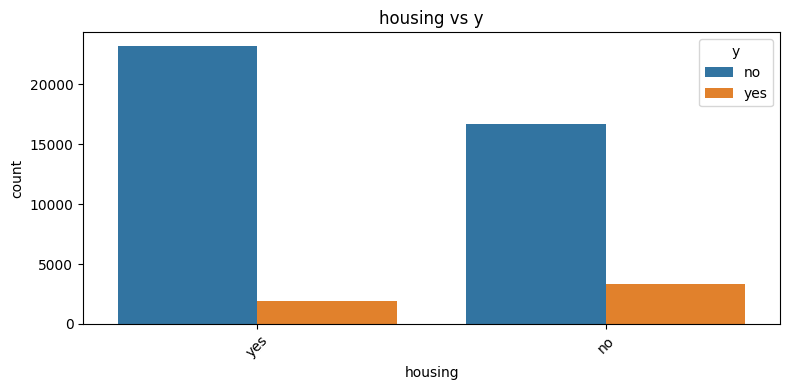

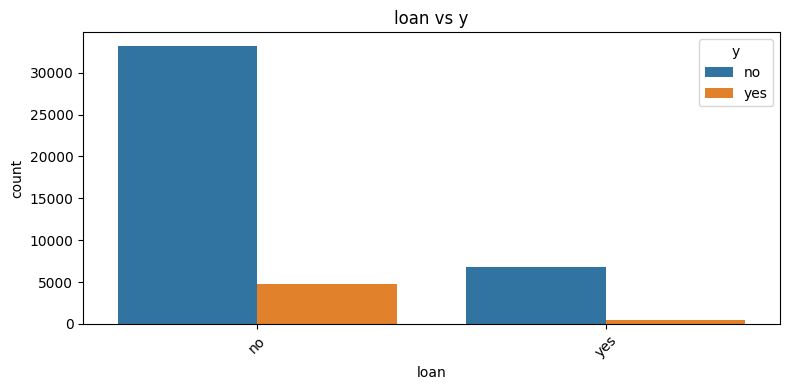

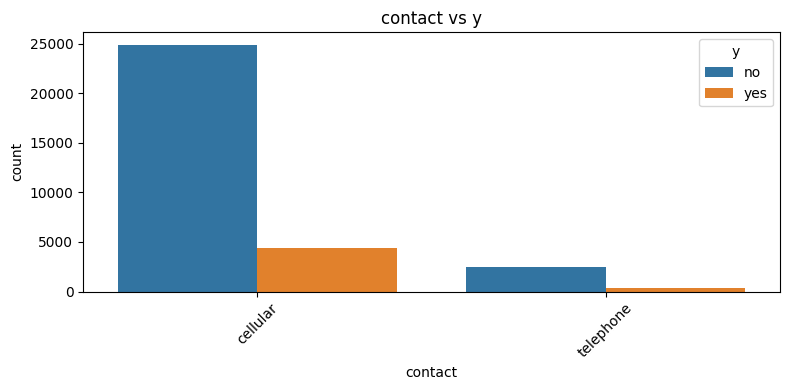

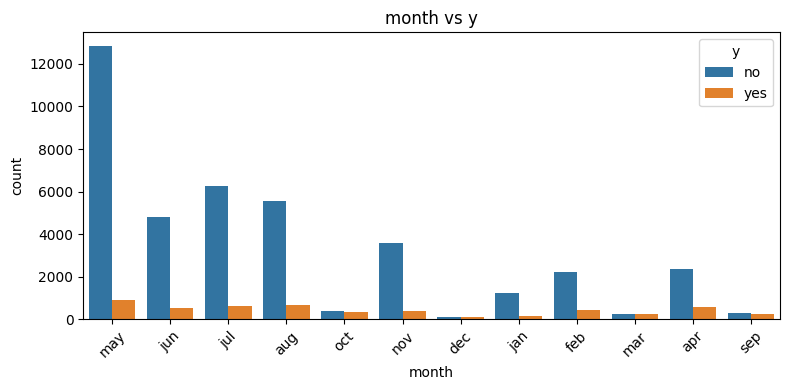

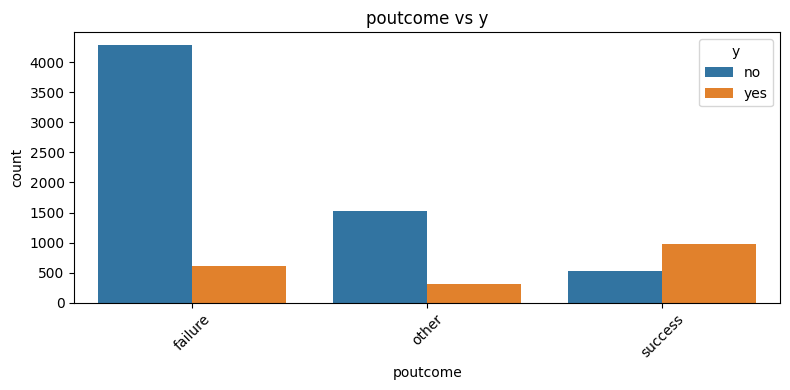

In [7]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols.remove('y')
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f"{col} vs y")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### **Heatmap korelasi fitur numerik**

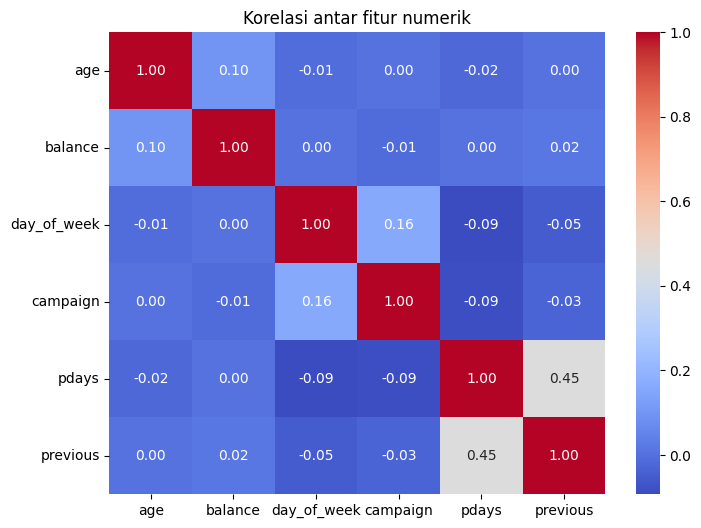

In [8]:
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi antar fitur numerik")
plt.show()


## **Reduksi Dimensi & Proyeksi**
Mirip dengan PCA/LDA sebelumnya, kita bisa coba:

* PCA untuk fitur numerik (setelah encoding fitur kategorikal) → proyeksi ke 2D → scatter plot dengan warna menurut y.

* LDA (karena target binary) → 1 atau 2 komponen diskriminan → scatter plot.

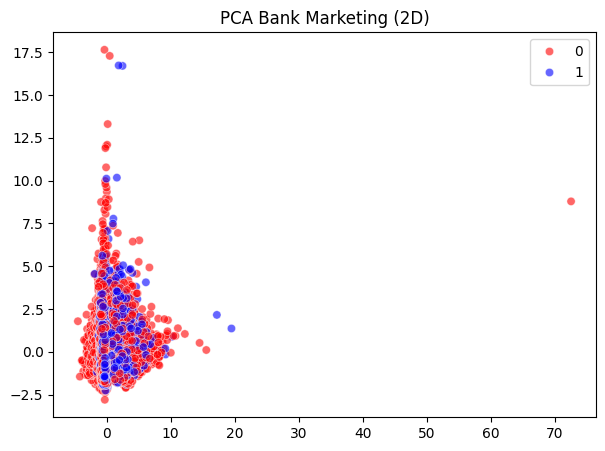

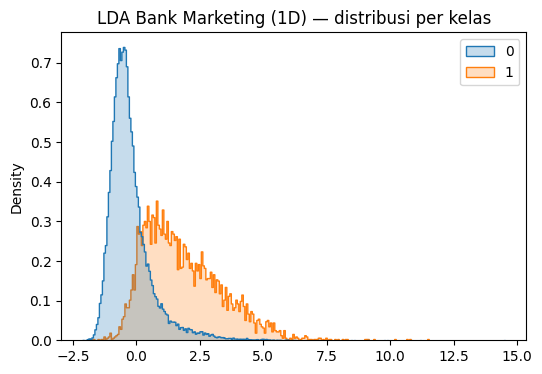

In [9]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Pisahkan fitur & target
X = df.drop(columns=['y'])
y = LabelEncoder().fit_transform(df['y'])  # “no”->0, “yes”->1

# Pra-proses fitur: numerik scaling + one-hot untuk kategorikal
numeric_feats = X.select_dtypes(include=["int64", "float64"]).columns
cat_feats = X.select_dtypes(include=["object"]).columns

ct = ColumnTransformer([
    ("num", StandardScaler(), numeric_feats),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_feats)
])

X_transformed = ct.fit_transform(X)

# PCA → 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette=["red","blue"], alpha=0.6)
plt.title("PCA Bank Marketing (2D)")
plt.show()

# LDA → 1 komponen (untuk binary target)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed, y)

plt.figure(figsize=(6,4))
sns.histplot(x=X_lda[:,0], hue=y, element="step", stat="density", common_norm=False)
plt.title("LDA Bank Marketing (1D) — distribusi per kelas")
plt.show()


## **Klasifikasi (Random Forest + evaluasi)**

In [10]:
# ---------------------------------------------------------------
# 4. CLASSIFICATION
# ---------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y
)

# Model Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluasi
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix ===
[[7763  222]
 [ 641  417]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



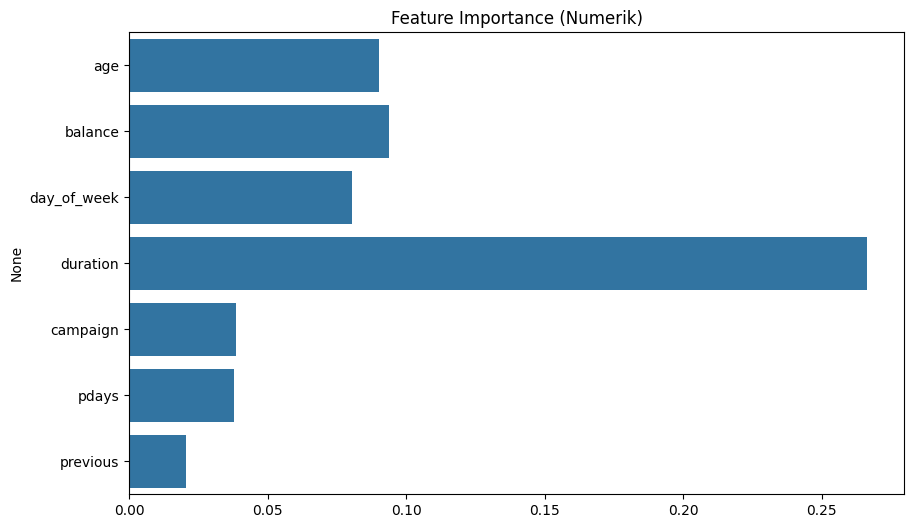

In [12]:
# Feature importance (opsional untuk fitur numerik)
plt.figure(figsize=(10,6))
feat_imp = clf.feature_importances_[:len(numeric_feats)]
sns.barplot(x=feat_imp, y=numeric_feats)
plt.title("Feature Importance (Numerik)")
plt.show()

## **Bandingkan dengan Random Forest, Naive Bayes, dan K-Nearest Neighbors (KNN) menggunakan metrik evaluasi yang sama.**

Dataset shape: (45211, 17)

===== Random Forest =====
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043


===== Naive Bayes =====
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      7985
           1       0.41      0.52      0.46      1058

    accuracy                           0.85      9043
   macro avg       0.67      0.71      0.69      9043
weighted avg       0.87      0.85      0.86      9043


===== KNN (k=5) =====
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.60      0.34      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.76   

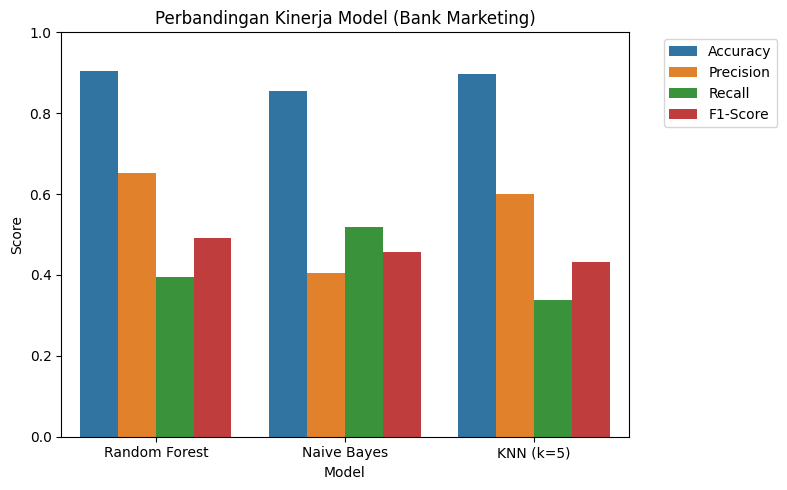


🏆 Model terbaik berdasarkan F1-Score: Random Forest (F1 = 0.4915)


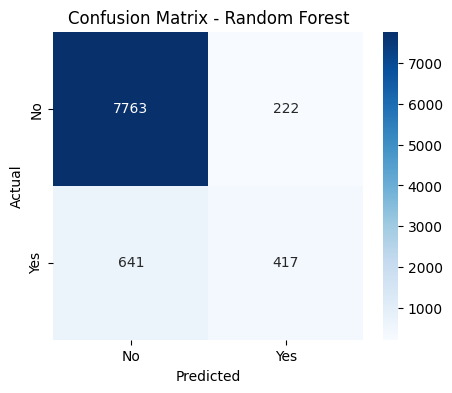

In [14]:
# ================================================================
#  📊 BANK MARKETING - MODEL COMPARISON (with Best Model Selection)
# ================================================================
# Models: Random Forest, Naive Bayes, KNN
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# ---------------------------------------------------------------
# 1. LOAD & PREPROCESS
# ---------------------------------------------------------------

print("Dataset shape:", df.shape)

# Pisahkan fitur dan target
X = df.drop(columns=['y'])
y = LabelEncoder().fit_transform(df['y'])  # yes=1, no=0

# Pra-proses: scale numerik + one-hot kategorikal
num_feats = X.select_dtypes(include=['int64','float64']).columns
cat_feats = X.select_dtypes(include=['object']).columns

ct = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
])

X_transformed = ct.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------------------
# 2. DEFINISI MODEL
# ---------------------------------------------------------------
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# ---------------------------------------------------------------
# 3. LATIH, UJI, DAN NILAI
# ---------------------------------------------------------------
results = []
best_model = None
best_score = 0

for name, model in models.items():
    print(f"\n===== {name} =====")

    # Handle Naive Bayes yang butuh dense matrix
    if name == "Naive Bayes":
        X_train_fit = X_train.toarray() if hasattr(X_train, "toarray") else X_train
        X_test_fit = X_test.toarray() if hasattr(X_test, "toarray") else X_test
    else:
        X_train_fit, X_test_fit = X_train, X_test

    # Training
    model.fit(X_train_fit, y_train)
    y_pred = model.predict(X_test_fit)

    # Metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(classification_report(y_test, y_pred))

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    # Simpan model terbaik (berdasarkan F1)
    if f1 > best_score:
        best_score = f1
        best_model = (name, model)

# ---------------------------------------------------------------
# 4. RINGKASAN HASIL
# ---------------------------------------------------------------
results_df = pd.DataFrame(results)
print("\n=== RINGKASAN HASIL ===")
print(results_df)

# Plot hasil perbandingan
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric")
plt.title("Perbandingan Kinerja Model (Bank Marketing)")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 5. MODEL TERBAIK
# ---------------------------------------------------------------
best_name, best_clf = best_model
print(f"\n🏆 Model terbaik berdasarkan F1-Score: {best_name} (F1 = {best_score:.4f})")

# Confusion matrix untuk model terbaik
y_pred_best = best_clf.predict(X_test.toarray() if best_name == "Naive Bayes" else X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_name}")
plt.show()


**Penjelasan:**
* Menyimpan hasil evaluasi semua model (Accuracy, Precision, Recall, F1).

* Menentukan model terbaik otomatis berdasarkan F1-Score (bisa ganti ke Accuracy kalau mau).

| Model             | Kelebihan                                      | Kekurangan                                            |
| ----------------- | ---------------------------------------------- | ----------------------------------------------------- |
| **Random Forest** | Akurasi tinggi, tangguh terhadap data campuran | Butuh waktu lebih lama & interpretasi lebih sulit     |
| **Naive Bayes**   | Cepat, cocok untuk data kategorikal            | Asumsi independensi fitur sering tidak realistis      |
| **KNN**           | Mudah dipahami, non-parametrik                 | Lambat di dataset besar, sensitif terhadap skala data |

**Output yang Dihasilkan:**

* Classification report per model (precision, recall, f1-score per kelas)

* Tabel ringkasan hasil

* Barplot perbandingan performa antar model
* Confusion Matrix hanya untuk model terbaik.